# WordCloud

In [ ]:
import pandas as pd
from collections import Counter
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv('data/프로젝트 데이터_API/상해_본문2.csv')
# Okt 객체 생성
okt = Okt()

# 명사 추출을 위한 리스트 초기화
nouns = []

# 판례내용_정제 열의 각 문서에 대해 명사 추출
for doc in df['판례내용'].iloc[:100]:
    nouns.extend(okt.nouns(doc))

# 명사 빈도 계산
word_freq = Counter(nouns)


# 한글 폰트 경로 지정 (맑음고딕 폰트를 사용한 경우)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 파일 경로 수정

# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,  # 한글 폰트 경로 설정
                      width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


most_common_words = word_freq.most_common(20)
# most_common_words의 내용을 단어와 빈도로 분리
words, counts = zip(*most_common_words)

# 시각화 (막대 그래프)
plt.figure(figsize=(10, 8))
sns.barplot(x=counts, y=words, palette='viridis', hue=words, dodge=False, legend=False)  # hue로 y 변수 할당
plt.title('Top 50 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


In [ ]:
import pickle
from collections import Counter

with open('data/okt.pkl', 'rb') as f:
    normalized = pickle.load(f)
type(normalized[0])

normalized_list = normalized.apply(lambda x: x.split()).tolist()

from itertools import chain

# 리스트 안의 리스트를 하나의 리스트로 평탄화
flattened_list = list(chain.from_iterable(normalized_list))

# 단어 빈도 계산
word_freq = Counter(flattened_list)

In [2]:
#불용어 읽어오기
stopwords_file_path = 'stopwords_dh_last.txt'
stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

In [ ]:
import pandas as pd
from collections import Counter
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle
from collections import Counter

#불용어 읽어오기
stopwords_file_path = 'stopwords_dh_lastlast.txt'
stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

with open('data/okt.pkl', 'rb') as f:
    normalized = pickle.load(f)

normalized_list = normalized.apply(lambda x: x.split()).tolist()

from itertools import chain

# 리스트 안의 리스트를 하나의 리스트로 평탄화
flattened_list = list(chain.from_iterable(normalized_list))

# 불용어를 제거한 리스트 생성
filtered_list = [word for word in flattened_list if word not in stopwords]

# 단어 빈도 계산
word_freq = Counter(filtered_list)

# 한글 폰트 경로 지정 (맑음고딕 폰트를 사용한 경우)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 파일 경로 수정

# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,  # 한글 폰트 경로 설정
                      width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

In [ ]:
import pandas as pd
from collections import Counter
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pickle
from collections import Counter

#불용어 읽어오기
stopwords_file_path = 'stopwords_dh_lastlast.txt'
stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

with open('data/okt.pkl', 'rb') as f:
    normalized = pickle.load(f)

normalized_list = normalized.apply(lambda x: x.split()).tolist()

from itertools import chain

# 리스트 안의 리스트를 하나의 리스트로 평탄화
flattened_list = list(chain.from_iterable(normalized_list))

# 불용어를 제거한 리스트 생성
filtered_list = [word for word in flattened_list if word not in stopwords]

# 단어 빈도 계산
word_freq = Counter(filtered_list)

# 한글 폰트 경로 지정 (맑음고딕 폰트를 사용한 경우)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 폰트 파일 경로 수정

# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,  # 한글 폰트 경로 설정
                      width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

# WordCloud Top100 단어 추출

판례내용 중 판례내용[이유]를 기준으로 WordCloud하기로 한다.

In [3]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter

df=pd.read_csv('data/hurtcombined.csv')
reason=df['판례내용_이유']

#NaN값 처리
reason= reason.fillna('')

#Okt호출
okt = Okt()

#정규화한 뒤 명사추출
normalized = reason.apply(lambda x: ' '.join(okt.nouns(okt.normalize(x))))

normalized.head(10)

0    이 유 원고 원심 승소 부분 대한 상고 적법 여부 관 직권 판단 판결 중 승소 부분...
1    이 유 상고 이유 판단 검사 상고 이유 관 경 폭행 부분 원심 이유 이 부분 사실 ...
2    이 유 상고 이유 판단 사건 개요 쟁점 소송 진행 경과 원심 판결 이유 및 기록 다...
3    이 유 이 법원 심판 범위 경합 범 동시 기소 사건 대하 일부 유죄 일부 무죄 선고...
4    이 유 범 죄 사 실 범죄 전력 피고인 자 항소심 판결 피고인 은 수원지방법원 폭력...
5    이 유 범죄 사실 피고인 경 안양시 주소 생략 지하 층 상호 생략 빠 피해자 소외 ...
6    이 유 직권 판단 형사소송법 제 제 항 피고인 구속 때 등 각 호의 사유 피고인 청...
7    이 유 항소 이유 요지 피고인 피해자 합의 점 등 제반 정상 원심 양형 벌금 원 은...
8    이 유 상고 이유 판단 피고인 상고 이유 관 원심 판결 이유 기록 원심 그 이유 이...
9    이 유 항소 이유 요지 검사 사실 오인 내지 법리 오해 점 특수 공무 집행 방해 점...
Name: 판례내용_이유, dtype: object

In [4]:
#불용어 읽어오기
stopwords_file_path = 'stopwords_dh_lastlast.txt'
stopwords = []
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    stopwords = [line.strip() for line in file.readlines()]

In [10]:
#판례내용-이유를 피클로 저장
normalized.to_pickle('data/reason.pkl')

In [11]:
# 모든 명사 추출하여 하나의 문자열로 결합
all_nouns = ' '.join(normalized.dropna())

# 명사 빈도 계산
word_freq = Counter(word for word in all_nouns.split() if word not in stopwords)

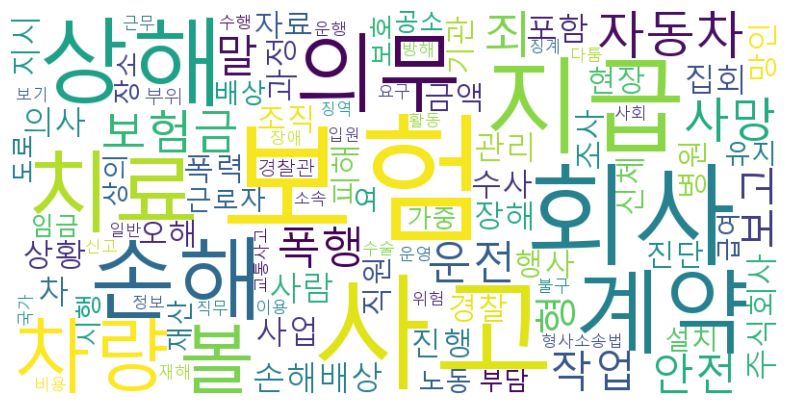

In [22]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# 한글 폰트 경로 지정 (맑음고딕 폰트를 사용한 경우)
font_path = 'C:/Windows/Fonts/malgun.ttf' 

# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,  # 한글 폰트 경로 설정
                      width=800, height=400, background_color='white',max_words=100).generate_from_frequencies(word_freq)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

In [23]:
word_freq.most_common(100)

[('보험', 15317),
 ('사고', 12045),
 ('회사', 8932),
 ('지급', 8155),
 ('상해', 6748),
 ('계약', 6011),
 ('손해', 5815),
 ('치료', 5661),
 ('의무', 5342),
 ('차량', 4810),
 ('볼', 4492),
 ('자동차', 3873),
 ('죄', 3652),
 ('사망', 3394),
 ('보험금', 3324),
 ('운전', 3240),
 ('폭행', 3132),
 ('말', 3114),
 ('형', 3017),
 ('작업', 2968),
 ('안전', 2966),
 ('보고', 2854),
 ('손해배상', 2849),
 ('과정', 2808),
 ('사람', 2795),
 ('차', 2698),
 ('의사', 2679),
 ('관리', 2661),
 ('상황', 2631),
 ('포함', 2630),
 ('사업', 2620),
 ('주식회사', 2619),
 ('집회', 2556),
 ('진행', 2541),
 ('병원', 2426),
 ('경찰', 2410),
 ('직원', 2406),
 ('금액', 2401),
 ('행사', 2360),
 ('장해', 2346),
 ('수사', 2305),
 ('폭력', 2249),
 ('지시', 2213),
 ('망인', 2206),
 ('피해', 2189),
 ('신체', 2159),
 ('조사', 2134),
 ('자료', 2055),
 ('조직', 2012),
 ('기관', 1991),
 ('진단', 1974),
 ('현장', 1971),
 ('오해', 1963),
 ('근로자', 1960),
 ('여', 1953),
 ('유지', 1947),
 ('설치', 1928),
 ('노동', 1908),
 ('배상', 1904),
 ('상의', 1894),
 ('보호', 1886),
 ('장소', 1881),
 ('재산', 1877),
 ('시행', 1872),
 ('부담', 1857),
 ('도로', 1846),
 ('임금',

TF-IDF 변환

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


# TF-IDF 벡터라이저 설정: 상위 10,000개의 단어만 사용하고 불용어 제거
vectorizer = TfidfVectorizer(max_features=10000, stop_words=stopwords, min_df=2, max_df=0.95)

# 데이터프레임을 1000개씩 나눠서 처리할 준비
chunk_size = 1000
tfidf_result = []  # 청크 처리 결과를 저장할 리스트

print("처리 시작...")

# 데이터를 청크로 나누어 처리
for i in range(0, len(normalized), chunk_size):
    # 현재 청크 데이터 추출
    doc_chunk = normalized[i:i+chunk_size]
    
    # TF-IDF 적용
    tfidf_array = vectorizer.fit_transform(doc_chunk)
    
    # 청크 결과를 데이터프레임으로 변환하여 리스트에 저장
    tfidf_result.append(pd.DataFrame(tfidf_array.toarray(), columns=vectorizer.get_feature_names_out()))
    
    # 청크 처리 완료 메시지 출력
    print(f"{i+chunk_size}개 문서 처리 완료")

# 5. 모든 청크를 하나의 데이터프레임으로 합침
tfidf_df = pd.concat(tfidf_result, ignore_index=True)

# 6. 최종 결과 확인 (상위 5개 출력)
print("최종 결과:")
print(tfidf_df.head())

# 7. 데이터프레임의 크기 및 처리 완료 메시지
print(f"TF-IDF 처리 완료. 최종 데이터프레임 크기: {tfidf_df.shape}")

처리 시작...


c:\Users\user\anaconda3\envs\myenv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['겸박월금의소송수계인', '경락인', '고지명령청구자', '공동소송적', '국선', '군검찰관', '낙찰인', '낙찰자', '당심', '독립참가', '매수인', '미성년자', '반심판피청구인', '반심피청구인', '법정대리인', '변론관여', '본심판상대방', '본안원고', '비약', '비약적', '사선', '소외1소송수계인', '수계신청인', '신청인겸파산자', '예비적', '위반자', '유언자', '유언집행자', '이의피신청인', '자녀', '재심상대방', '재심판청구인', '재심피청구인', '제3공탁자', '주1', '주위적', '중간확인피고', '탈퇴', '피공개', '피이의신청인'] not in stop_words.
  warnings.warn(


1000개 문서 처리 완료
2000개 문서 처리 완료
3000개 문서 처리 완료
4000개 문서 처리 완료
5000개 문서 처리 완료
최종 결과:
    가게   가격   가결   가공   가관   가구   가기       가까이   가끔        가납  ...  센텀  업그레이드  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ... NaN    NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.032634  0.0  0.000000  ... NaN    NaN   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ... NaN    NaN   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.021424  ... NaN    NaN   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.012012  ... NaN    NaN   

   영업정지  운수업체  임부  최병준  표적  환진  황사  후드  
0   NaN   NaN NaN  NaN NaN NaN NaN NaN  
1   NaN   NaN NaN  NaN NaN NaN NaN NaN  
2   NaN   NaN NaN  NaN NaN NaN NaN NaN  
3   NaN   NaN NaN  NaN NaN NaN NaN NaN  
4   NaN   NaN NaN  NaN NaN NaN NaN NaN  

[5 rows x 11759 columns]
TF-IDF 처리 완료. 최종 데이터프레임 크기: (4189, 11759)


Jaccard 유사도 측정

In [66]:
from itertools import combinations
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import jaccard
from sklearn.metrics import jaccard_score


# 워드클라우드의 상위 100개 단어 리스트
top_100_words = [word for word, _ in word_freq.most_common(100)]

# Jaccard 유사도를 계산하기 위해 단어 벡터화
vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(1, 1))  # 단어를 문자 n-그램으로 변환
word_vectors = vectorizer.fit_transform(top_100_words).toarray()

# 단어 리스트
words = vectorizer.get_feature_names_out()

# 각 단어에 대해 상위 10개의 유사도 계산
top_n = 10
for i, word in enumerate(top_100_words):
    # Jaccard 유사도 계산
    similarities = []
    for j, other_word in enumerate(top_100_words):
        if i != j:
            similarity = jaccard_score(word_vectors[i], word_vectors[j], average='macro')
            similarities.append((other_word, similarity))
    
    # 유사도 기준으로 상위 10개 선택
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]
    
    # 결과 출력
    print(f"단어 '{word}'의 상위 {top_n} 유사 단어:")
    for other_word, similarity in similarities:
        print(f"   {other_word}: {similarity:.4f}")
    print()

AttributeError: 'dict' object has no attribute 'most_common'

코사인 유사도 측정

-Word2Vec로 변환해서 측정하려다 TF-IDF로 변환해서 측정

In [ ]:
from collections import Counter
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors

top_100_words = [word for word, _ in word_freq.most_common(100)]
model = KeyedVectors.load_word2vec_format('path_to_model.bin', binary=True)

In [ ]:
word_freq.most_common(100)

# WordCloud 단어간 유사도 측정

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TF-IDF 벡터라이저 적용
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(word for word, __ in word_freq.most_common(100))

# K-Means 클러스터링 수행 (k=5로 설정)
num_clusters = 8
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# 클러스터별 상위 단어 및 그 단어들의 TF-IDF 값 확인
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

# 클러스터 라벨 얻기
labels = km.labels_

print("클러스터별 상위 단어 및 TF-IDF 값:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :10]:  # 상위 10개의 단어
        print(f"단어: {terms[ind]} - TF-IDF 값: {km.cluster_centers_[i, ind]}")

# 실루엣 점수 계산
silhouette_avg = silhouette_score(tfidf_matrix, labels)
print("실루엣 점수: ", silhouette_avg)


실루엣 점수:  0.021816233815926768
실루엣 점수:  0.0219028183197455
실루엣 점수:  0.021993010511223366
실루엣 점수:  0.0220870406682961
실루엣 점수:  0.022185159093067553
실루엣 점수:  0.02228763833671779
실루엣 점수:  0.02239477572780665
실루엣 점수:  0.022506896253364755
실루엣 점수:  0.022624355851568457
실루엣 점수:  0.022747545186269896
실루엣 점수:  0.022876893987706454
실루엣 점수:  0.023012876061011572
실루엣 점수:  0.02315601508554323
실루엣 점수:  0.02330689135464416
실루엣 점수:  0.02346614963869518
실루엣 점수:  0.023634508396120562
실루엣 점수:  0.02381277060986501
실루엣 점수:  0.024001836594139476
실루엣 점수:  0.0242027192024311
실루엣 점수:  0.024416561978999596
실루엣 점수:  0.02464466094067265
실루엣 점수:  0.024888490865219725
실루엣 점수:  0.025149737212948733
실루엣 점수:  0.025430335141990983
실루엣 점수:  0.025732517527113447
실루엣 점수:  0.026058874503045674
실루엣 점수:  0.02641242789363896
실루엣 점수:  0.02679672505732729
실루엣 점수:  0.027215958326805477
실루엣 점수:  0.02767511857432922
실루엣 점수:  0.028180194846605337
실루엣 점수:  0.028738437042278932
실루엣 점수:  0.029358706148582915
실루엣 점수:  0.030051948090922

c:\Users\user\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (95) found smaller than n_clusters (96). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (95) found smaller than n_clusters (97). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (95) found smaller than n_clusters (98). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (95) found smaller than n_clusters (99). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwar

In [42]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# 예시: 다양한 클러스터 수에 대해 클러스터링 수행
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(tfidf_matrix)
    labels = kmeans.labels_
    
    if len(set(labels)) > 1:  # 클러스터가 2개 이상일 때만
        silhouette_avg = silhouette_score(tfidf_matrix.toarray(), labels)  # 밀집 배열로 변환
        db_index = davies_bouldin_score(tfidf_matrix.toarray(), labels)  # 밀집 배열로 변환
        print(f"클러스터 수: {n_clusters}, 실루엣 점수: {silhouette_avg}, Davies-Bouldin Index: {db_index}")
    else:
        print(f"클러스터 수: {n_clusters}에서 클러스터가 하나만 존재합니다.")

클러스터 수: 2, 실루엣 점수: 0.019738205724277, Davies-Bouldin Index: 0.935822661907405
클러스터 수: 3, 실루엣 점수: 0.019760521318044826, Davies-Bouldin Index: 0.9352024154569509
클러스터 수: 4, 실루엣 점수: 0.01978330182001615, Davies-Bouldin Index: 0.9345699178335118
클러스터 수: 5, 실루엣 점수: 0.01980656191150253, Davies-Bouldin Index: 0.9339248000289253
클러스터 수: 6, 실루엣 점수: 0.019830316898552584, Davies-Bouldin Index: 0.9332666779973217
클러스터 수: 7, 실루엣 점수: 0.019854582745539112, Davies-Bouldin Index: 0.9325951518784825
클러스터 수: 8, 실루엣 점수: 0.019879376110938343, Davies-Bouldin Index: 0.9319098051724288
클러스터 수: 9, 실루엣 점수: 0.0199047143854673, Davies-Bouldin Index: 0.9312102038615993


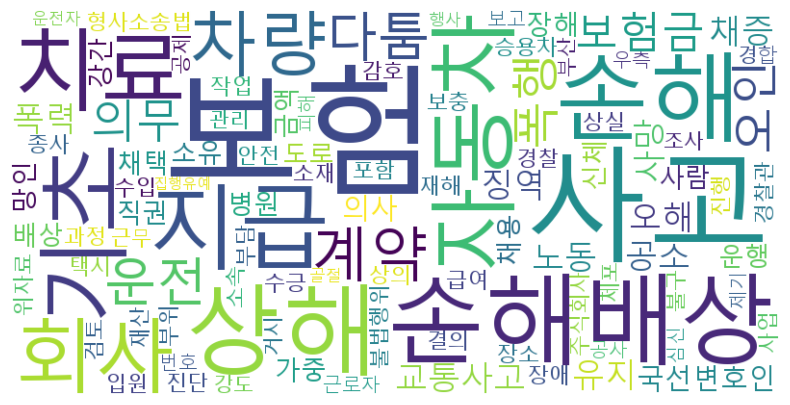

In [43]:
tfdif_means=tfidf_df.mean().sort_values(ascending=False)[:100]

# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,  # 한글 폰트 경로 설정
                      width=800, height=400, background_color='white').generate_from_frequencies(tfdif_means)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

In [44]:
tfdif_means

보험      0.050927
사고      0.039827
손해배상    0.023154
상해      0.023075
손해      0.021643
          ...   
제기      0.005471
운전자     0.005443
행사      0.005423
골절      0.005371
집행유예    0.005310
Length: 100, dtype: float64

# aasa

okt로 토큰화한걸 가지고 불용어 제거->tf-idf후 K-means clustering 수행 ->

In [ ]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter

df=pd.read_csv('data/hurtcombined.csv')
reason=df['판례내용_이유']

#NaN값 처리
reason= reason.fillna('')

#Okt호출
okt = Okt()

#정규화한 뒤 명사추출
normalized = reason.apply(lambda x: ' '.join(okt.nouns(okt.normalize(x))))

normalized.head(10)

0    이 유 원고 원심 승소 부분 대한 상고 적법 여부 관 직권 판단 판결 중 승소 부분...
1    이 유 상고 이유 판단 검사 상고 이유 관 경 폭행 부분 원심 이유 이 부분 사실 ...
2    이 유 상고 이유 판단 사건 개요 쟁점 소송 진행 경과 원심 판결 이유 및 기록 다...
3    이 유 이 법원 심판 범위 경합 범 동시 기소 사건 대하 일부 유죄 일부 무죄 선고...
4    이 유 범 죄 사 실 범죄 전력 피고인 자 항소심 판결 피고인 은 수원지방법원 폭력...
5    이 유 범죄 사실 피고인 경 안양시 주소 생략 지하 층 상호 생략 빠 피해자 소외 ...
6    이 유 직권 판단 형사소송법 제 제 항 피고인 구속 때 등 각 호의 사유 피고인 청...
7    이 유 항소 이유 요지 피고인 피해자 합의 점 등 제반 정상 원심 양형 벌금 원 은...
8    이 유 상고 이유 판단 피고인 상고 이유 관 원심 판결 이유 기록 원심 그 이유 이...
9    이 유 항소 이유 요지 검사 사실 오인 내지 법리 오해 점 특수 공무 집행 방해 점...
Name: 판례내용_이유, dtype: object

In [50]:
normalized_no_stopwords = normalized.apply(lambda x: ' '.join(
    [word for word in x.split() if word not in stopwords]
))

In [51]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TF-IDF 벡터라이저 적용
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(normalized_no_stopwords)

# K-Means 클러스터링 수행 (k=8로 설정)
num_clusters = 8
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)

# 클러스터별 상위 단어 및 그 단어들의 TF-IDF 값 확인
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

# 클러스터 라벨 얻기
labels = km.labels_

print("클러스터별 상위 단어 및 TF-IDF 값:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :10]:  # 상위 10개의 단어
        print(f"단어: {terms[ind]} - TF-IDF 값: {km.cluster_centers_[i, ind]}")

# 실루엣 점수 계산
silhouette_avg = silhouette_score(tfidf_matrix, labels)
print("실루엣 점수: ", silhouette_avg)

클러스터별 상위 단어 및 TF-IDF 값:

클러스터 1:
단어: 회사 - TF-IDF 값: 0.14444195394355402
단어: 근로자 - TF-IDF 값: 0.053279992789304516
단어: 작업 - TF-IDF 값: 0.0493201685949248
단어: 사업 - TF-IDF 값: 0.04869768348208307
단어: 징계 - TF-IDF 값: 0.04384835003935661
단어: 공사 - TF-IDF 값: 0.043329782106538754
단어: 재해 - TF-IDF 값: 0.03661525272993508
단어: 해고 - TF-IDF 값: 0.03003881666972142
단어: 근로 - TF-IDF 값: 0.028998954050406804
단어: 소속 - TF-IDF 값: 0.028986502319840467

클러스터 2:
단어: 손해배상 - TF-IDF 값: 0.027781496585504953
단어: 국선변호인 - TF-IDF 값: 0.01753188123906353
단어: 다툼 - TF-IDF 값: 0.01746234719916033
단어: 유지 - TF-IDF 값: 0.012773758932374528
단어: 보충 - TF-IDF 값: 0.011794278995335307
단어: 거시 - TF-IDF 값: 0.010792272624703204
단어: 채용 - TF-IDF 값: 0.010220935062850647
단어: 판결이유 - TF-IDF 값: 0.009777872981076437
단어: 감호 - TF-IDF 값: 0.008946448033816506
단어: 의사 - TF-IDF 값: 0.008290875100394704

클러스터 3:
단어: 기초 - TF-IDF 값: 0.7968739104862568
단어: 다툼 - TF-IDF 값: 0.16384213123364333
단어: 지위 - TF-IDF 값: 0.07097460874350306
단어: 영상 - TF-IDF 값: 0.0699421616339

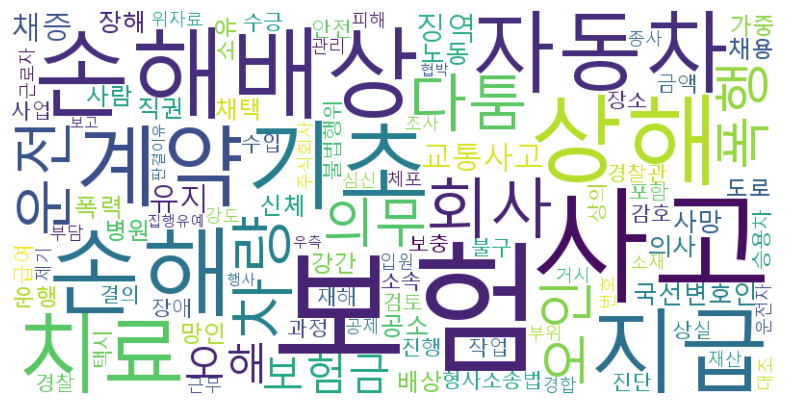

In [52]:
tfdif_means = tfidf_matrix.mean(axis=0).A1  # (1, n_features) 형태에서 1차원 배열로 변환
tfdif_means = pd.Series(tfdif_means, index=terms).sort_values(ascending=False)[:100]

# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,  # 한글 폰트 경로 설정
                      width=800, height=400, background_color='white').generate_from_frequencies(tfdif_means)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 숨기기
plt.show()

In [57]:
tfdif_means.index

Index(['보험', '사고', '손해배상', '상해', '손해', '기초', '지급', '자동차', '계약', '치료', '회사',
       '차량', '다툼', '운전', '폭행', '오인', '의무', '보험금', '오해', '교통사고', '유지', '채증',
       '징역', '국선변호인', '사망', '노동', '공소', '폭력', '의사', '장해', '가중', '채택', '운행',
       '소유', '직권', '도로', '망인', '사람', '채용', '병원', '신체', '배상', '강간', '형사소송법',
       '금액', '상실', '불법행위', '장애', '결의', '진단', '경찰관', '승용차', '보충', '포함', '재해',
       '소속', '진행', '급여', '감호', '작업', '경찰', '과정', '검토', '수긍', '안전', '불구', '상의',
       '사업', '수입', '장소', '택시', '위자료', '종사', '주식회사', '재산', '부위', '부담', '거시',
       '입원', '조사', '소재', '강도', '공제', '관리', '체포', '근무', '심신', '번호', '경합', '근로자',
       '운전자', '대조', '피해', '제기', '집행유예', '보고', '판결이유', '우측', '행사', '협박'],
      dtype='object')

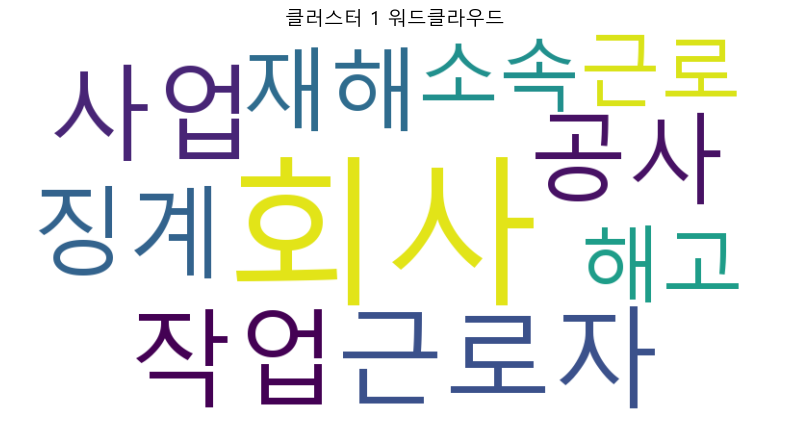

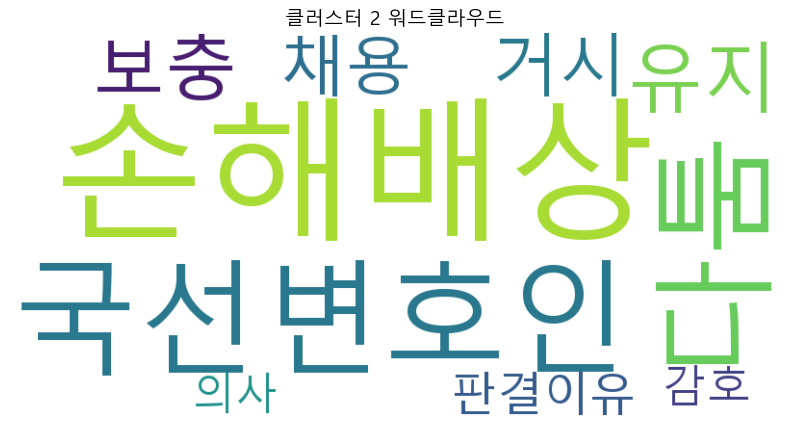

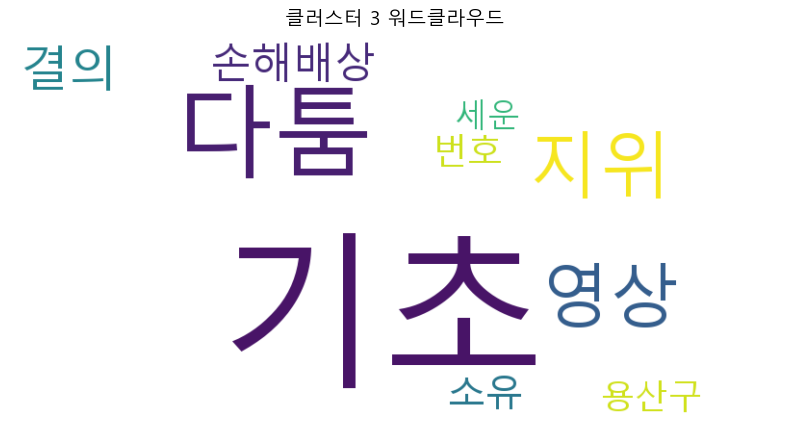

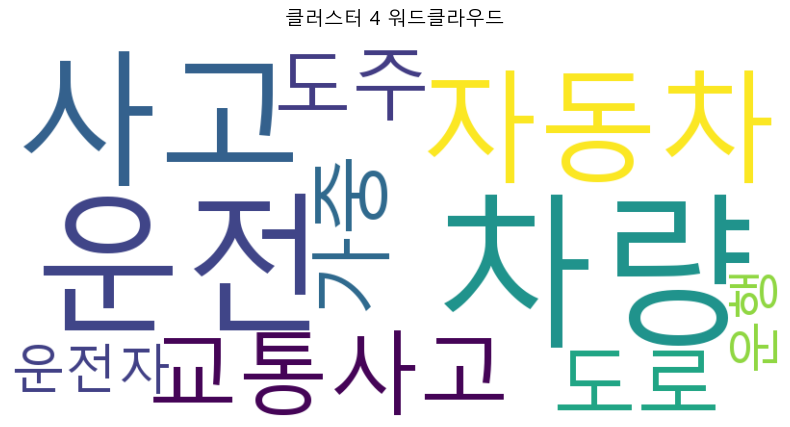

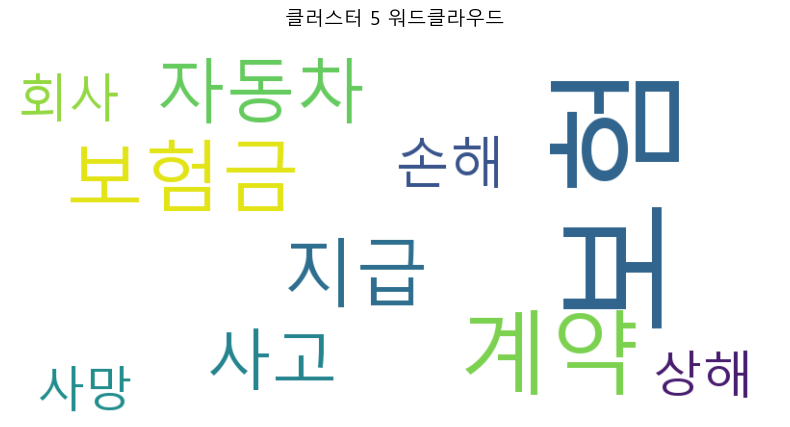

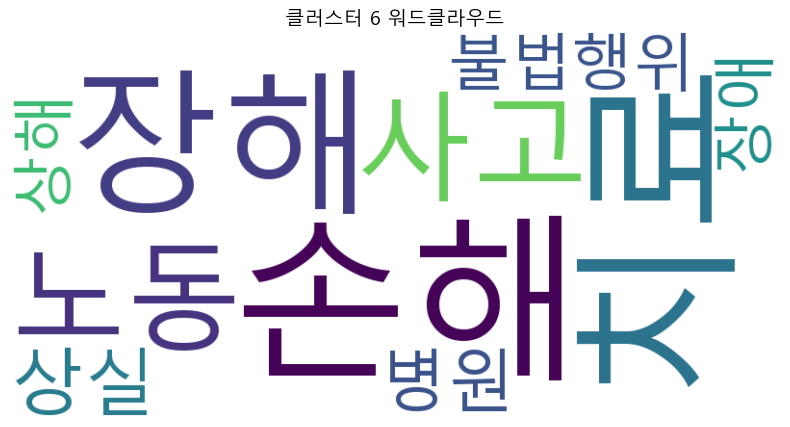

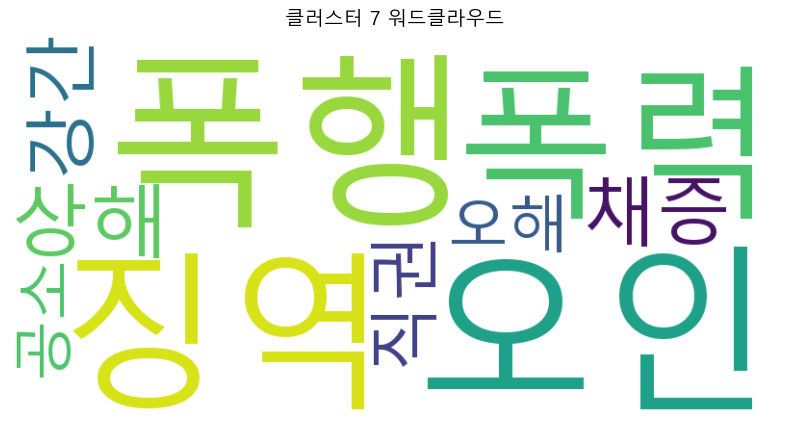

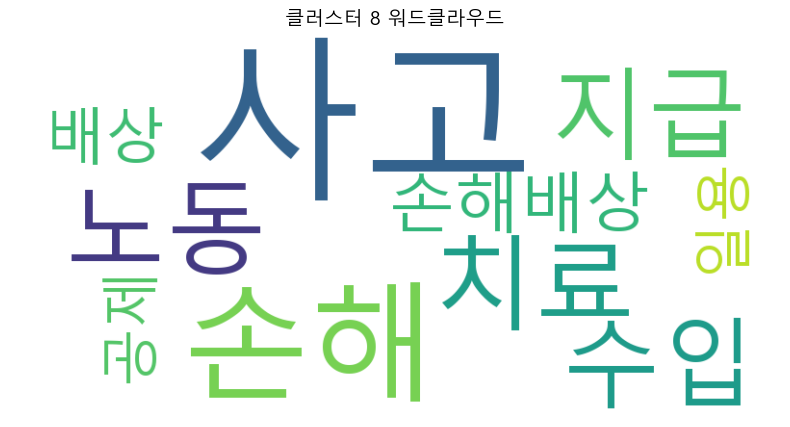

In [61]:
from matplotlib import font_manager
font_path = 'C:/Windows/Fonts/malgun.ttf' 
font_prop = font_manager.FontProperties(fname=font_path, size=14)
# 각 클러스터의 주요 단어를 위한 빈 딕셔너리 생성
cluster_words = {}

# 클러스터별 상위 단어 및 TF-IDF 값 저장
for i in range(num_clusters):
    cluster_words[i] = {}
    for ind in order_centroids[i, :10]:  # 상위 10개의 단어
        cluster_words[i][terms[ind]] = km.cluster_centers_[i, ind]

# 각 클러스터의 워드클라우드 생성 및 시각화
for i in range(num_clusters):
    # 워드클라우드에 사용할 단어와 그 TF-IDF 값 가져오기
    word_freq = cluster_words[i]
    
    # 워드클라우드 생성
    wordcloud = WordCloud(font_path=font_path,  # 한글 폰트 경로 설정
                          width=800, height=400, 
                          background_color='white').generate_from_frequencies(word_freq)
    
    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 축 숨기기
    plt.title(f"클러스터 {i + 1} 워드클라우드", fontproperties=font_prop)
    plt.show()

In [62]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# TF-IDF 벡터라이저 적용
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(normalized)

# 첫 번째 방법: TF-IDF를 통한 상위 100개 단어 클러스터링
# 전체 단어 TF-IDF 평균 계산
tfdif_means = tfidf_matrix.mean(axis=0).A1  # 1차원 배열로 변환
terms = vectorizer.get_feature_names_out()
top_100_tfidf = pd.Series(tfdif_means, index=terms).sort_values(ascending=False)[:100].index.tolist()

# K-Means 클러스터링
km_tfidf = KMeans(n_clusters=8, random_state=42)
km_tfidf.fit(tfidf_matrix)

# 클러스터 라벨 얻기
labels_tfidf = km_tfidf.labels_

# 두 번째 방법: 클러스터링 후 TF-IDF가 높은 100개 단어 선택
num_clusters = 8
cluster_top_words = {}

for i in range(num_clusters):
    cluster_indices = [j for j in range(len(labels_tfidf)) if labels_tfidf[j] == i]
    cluster_tfidf_matrix = tfidf_matrix[cluster_indices]
    
    # 클러스터 내 TF-IDF 평균 계산
    cluster_means = cluster_tfidf_matrix.mean(axis=0).A1
    cluster_terms = vectorizer.get_feature_names_out()
    
    top_100_cluster_words = pd.Series(cluster_means, index=cluster_terms).sort_values(ascending=False)[:100].index.tolist()
    cluster_top_words[i] = top_100_cluster_words

# 클러스터 비교
for cluster_num, words in cluster_top_words.items():
    # 각 클러스터별 상위 단어와 TF-IDF로 뽑은 상위 단어 비교
    common_words = set(words) & set(top_100_tfidf)
    print(f"클러스터 {cluster_num + 1}와 TF-IDF 상위 100개 단어의 공통 단어: {common_words}")

# 클러스터가 같은지 확인
for i in range(num_clusters):
    print(f"클러스터 {i + 1} 단어: {cluster_top_words[i]}")

클러스터 1와 TF-IDF 상위 100개 단어의 공통 단어: {'결과', '부분', '상해', '종합', '회사', '내용', '경우', '사고', '기재', '판단', '사이', '청구', '책임', '치료', '관계', '자동차', '취지', '당시', '다음', '노동', '원고', '사정', '인정', '장해', '주장', '증인', '증거', '손해배상', '차량', '교통사고', '이유', '범위', '운전', '원심', '기초', '대하', '변론', '피고', '대한', '기간', '발생', '로서', '보험', '손해', '호증', '판결', '다툼', '지급', '상고', '정도', '성립', '사건', '과실', '피해자', '소외', '소송대리인', '기록', '의무', '사실'}
클러스터 2와 TF-IDF 상위 100개 단어의 공통 단어: {'결과', '부분', '종합', '회사', '내용', '사고', '기재', '사이', '청구', '책임', '자동차', '취지', '다음', '원고', '인정', '증인', '손해배상', '교통사고', '이유', '기초', '원심', '변론', '피고', '대한', '발생', '보험', '호증', '판결', '내지', '다툼', '이하', '성립', '소외', '기록', '사실'}
클러스터 3와 TF-IDF 상위 100개 단어의 공통 단어: {'위법', '부분', '범죄', '요지', '법리', '기재', '판단', '징역', '청구', '양형', '심판', '자동차', '당시', '다음', '주장', '피고인', '변호인', '차량', '교통사고', '이유', '대하', '운전', '원심', '피고', '대한', '검사', '판결', '내지', '오해', '항소', '범행', '상고', '오인', '사건', '선고', '피해자', '소외', '사실'}
클러스터 4와 TF-IDF 상위 100개 단어의 공통 단어: {'위법', '결과', '상해', '범죄', '요지', '종합', '법리', '기재', 

In [63]:
# 클러스터 간 일치율 계산
def calculate_similarity(cluster_a, cluster_b):
    common_words = set(cluster_a) & set(cluster_b)
    similarity_rate = len(common_words) / len(set(cluster_a).union(set(cluster_b)))  # Jaccard 유사도 계산
    return len(common_words), similarity_rate

# 각 클러스터 쌍 간의 일치율 계산
for i in range(num_clusters):
    for j in range(i + 1, num_clusters):
        common_count, similarity_rate = calculate_similarity(cluster_top_words[i], cluster_top_words[j])
        print(f"클러스터 {i + 1}와 클러스터 {j + 1}의 공통 단어 수: {common_count}, 일치율: {similarity_rate:.2f}")

클러스터 1와 클러스터 2의 공통 단어 수: 37, 일치율: 0.23
클러스터 1와 클러스터 3의 공통 단어 수: 22, 일치율: 0.12
클러스터 1와 클러스터 4의 공통 단어 수: 23, 일치율: 0.13
클러스터 1와 클러스터 5의 공통 단어 수: 51, 일치율: 0.34
클러스터 1와 클러스터 6의 공통 단어 수: 32, 일치율: 0.19
클러스터 1와 클러스터 7의 공통 단어 수: 44, 일치율: 0.28
클러스터 1와 클러스터 8의 공통 단어 수: 34, 일치율: 0.20
클러스터 2와 클러스터 3의 공통 단어 수: 15, 일치율: 0.08
클러스터 2와 클러스터 4의 공통 단어 수: 13, 일치율: 0.07
클러스터 2와 클러스터 5의 공통 단어 수: 33, 일치율: 0.20
클러스터 2와 클러스터 6의 공통 단어 수: 20, 일치율: 0.11
클러스터 2와 클러스터 7의 공통 단어 수: 30, 일치율: 0.18
클러스터 2와 클러스터 8의 공통 단어 수: 20, 일치율: 0.11
클러스터 3와 클러스터 4의 공통 단어 수: 41, 일치율: 0.26
클러스터 3와 클러스터 5의 공통 단어 수: 23, 일치율: 0.13
클러스터 3와 클러스터 6의 공통 단어 수: 32, 일치율: 0.19
클러스터 3와 클러스터 7의 공통 단어 수: 39, 일치율: 0.24
클러스터 3와 클러스터 8의 공통 단어 수: 42, 일치율: 0.27
클러스터 4와 클러스터 5의 공통 단어 수: 21, 일치율: 0.12
클러스터 4와 클러스터 6의 공통 단어 수: 54, 일치율: 0.37
클러스터 4와 클러스터 7의 공통 단어 수: 48, 일치율: 0.32
클러스터 4와 클러스터 8의 공통 단어 수: 51, 일치율: 0.34
클러스터 5와 클러스터 6의 공통 단어 수: 29, 일치율: 0.17
클러스터 5와 클러스터 7의 공통 단어 수: 41, 일치율: 0.26
클러스터 5와 클러스터 8의 공통 단어 수: 32, 일치율: 0.19
클러스터 6와 클러스터 7의 공통 단어 수: 

In [65]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# TF-IDF 벡터라이저 적용
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(normalized)

# 첫 번째 방법: TF-IDF를 통한 상위 100개 단어 클러스터링
# 전체 단어 TF-IDF 평균 계산
tfdif_means = tfidf_matrix.mean(axis=0).A1  # 1차원 배열로 변환
terms = vectorizer.get_feature_names_out()
top_100_tfidf = pd.Series(tfdif_means, index=terms).sort_values(ascending=False)[:100].index.tolist()

# K-Means 클러스터링
km_tfidf = KMeans(n_clusters=8, random_state=42)
km_tfidf.fit(tfidf_matrix)

# 클러스터 라벨 얻기
labels_tfidf = km_tfidf.labels_

# 두 번째 방법: 클러스터링 후 TF-IDF가 높은 100개 단어 선택
num_clusters = 8
cluster_top_words = {}

for i in range(num_clusters):
    cluster_indices = [j for j in range(len(labels_tfidf)) if labels_tfidf[j] == i]
    cluster_tfidf_matrix = tfidf_matrix[cluster_indices]
    
    # 클러스터 내 TF-IDF 평균 계산
    cluster_means = cluster_tfidf_matrix.mean(axis=0).A1
    cluster_terms = vectorizer.get_feature_names_out()
    
    top_100_cluster_words = pd.Series(cluster_means, index=cluster_terms).sort_values(ascending=False)[:100].index.tolist()
    cluster_top_words[i] = top_100_cluster_words

# 클러스터 비교 및 일치율 계산
for cluster_num, words in cluster_top_words.items():
    # 각 클러스터별 상위 단어와 TF-IDF로 뽑은 상위 단어 비교
    common_words = set(words) & set(top_100_tfidf)
    union_words = set(words) | set(top_100_tfidf)
    
    # Jaccard 유사도 계산
    if union_words:
        similarity_rate = len(common_words) / len(union_words)
    else:
        similarity_rate = 0.0
    
    print(f"클러스터 {cluster_num + 1}와 TF-IDF 상위 100개 단어의 공통 단어: {common_words}")
    print(f"일치율 (Jaccard 유사도): {similarity_rate:.2f}")

# 클러스터가 같은지 확인
for i in range(num_clusters):
    print(f"클러스터 {i + 1} 단어: {cluster_top_words[i]}")

클러스터 1와 TF-IDF 상위 100개 단어의 공통 단어: {'결과', '부분', '상해', '종합', '회사', '내용', '경우', '사고', '기재', '판단', '사이', '청구', '책임', '치료', '관계', '자동차', '취지', '당시', '다음', '노동', '원고', '사정', '인정', '장해', '주장', '증인', '증거', '손해배상', '차량', '교통사고', '이유', '범위', '운전', '원심', '기초', '대하', '변론', '피고', '대한', '기간', '발생', '로서', '보험', '손해', '호증', '판결', '다툼', '지급', '상고', '정도', '성립', '사건', '과실', '피해자', '소외', '소송대리인', '기록', '의무', '사실'}
일치율 (Jaccard 유사도): 0.42
클러스터 2와 TF-IDF 상위 100개 단어의 공통 단어: {'결과', '부분', '종합', '회사', '내용', '사고', '기재', '사이', '청구', '책임', '자동차', '취지', '다음', '원고', '인정', '증인', '손해배상', '교통사고', '이유', '기초', '원심', '변론', '피고', '대한', '발생', '보험', '호증', '판결', '내지', '다툼', '이하', '성립', '소외', '기록', '사실'}
일치율 (Jaccard 유사도): 0.21
클러스터 3와 TF-IDF 상위 100개 단어의 공통 단어: {'위법', '부분', '범죄', '요지', '법리', '기재', '판단', '징역', '청구', '양형', '심판', '자동차', '당시', '다음', '주장', '피고인', '변호인', '차량', '교통사고', '이유', '대하', '운전', '원심', '피고', '대한', '검사', '판결', '내지', '오해', '항소', '범행', '상고', '오인', '사건', '선고', '피해자', '소외', '사실'}
일치율 (Jaccard 유사도): 0.23
클러스터 4와 TF-

1. TF-IDF를 한 후 평균 TF-IDF가 높은 100개 단어를 추려낸 후 이걸 클러스터링 해서 WordCloud에서 단어를 선택할 때 유사어들 선택시 출력값을 같게한다.(출력값이 없거나 너무 적어지지 않게하기 위함)
2. TF-IDF를 한 후 K-Means Clustering을 통해 분류하고 평균 TF-IDF가 높은 100개 단어로 WordCloud해서 선행하여 분류한 클러스터로 WordCloud의 단어들을 분류하는 방법. (내 방법)